In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

In [2]:
data = pd.read_csv('results.csv')
data.head(5)

,year,city,country,city_avg_temp,global_avg_temp
0,1743,Dublin,Ireland,6.80,8.72
1,1744,Dublin,Ireland,9.28,7.98
2,1745,Dublin,Ireland,4.32,5.78
3,1746,Dublin,Ireland,NaN,8.39
4,1747,Dublin,Ireland,NaN,8.47


In [3]:
result = pd.DataFrame(data)

In [4]:
result.head(5)

,year,city,country,city_avg_temp,global_avg_temp
0,1743,Dublin,Ireland,6.80,8.72
1,1744,Dublin,Ireland,9.28,7.98
2,1745,Dublin,Ireland,4.32,5.78
3,1746,Dublin,Ireland,NaN,8.39
4,1747,Dublin,Ireland,NaN,8.47


In [5]:
ma_window = 10
result['localMA'] = result.iloc[:,3].rolling(window=ma_window).mean()
result['globalMA'] = result.iloc[:,4].rolling(window=ma_window).mean()
result = result.dropna()
result.head(10)

,year,city,country,city_avg_temp,global_avg_temp,localMA,globalMA
16,1759,Dublin,Ireland,8.82,8.41,8.435,8.088
17,1760,Dublin,Ireland,8.14,8.22,8.317,8.008
18,1761,Dublin,Ireland,8.95,6.78,8.300,8.012
19,1762,Dublin,Ireland,8.32,7.69,8.504,7.982
20,1763,Dublin,Ireland,7.95,7.69,8.436,8.032
21,1764,Dublin,Ireland,8.26,7.85,8.403,7.940
22,1765,Dublin,Ireland,8.08,8.19,8.382,7.898
23,1766,Dublin,Ireland,8.24,8.22,8.331,7.970
24,1767,Dublin,Ireland,8.38,8.77,8.297,8.007
25,1768,Dublin,Ireland,8.25,9.18,8.339,8.100


In [6]:
city = 'Dublin'
start = int(result.min(axis=0)['year'])
end = int(result.max(axis=0)['year'])

Text(0, 0.5, 'temprature')

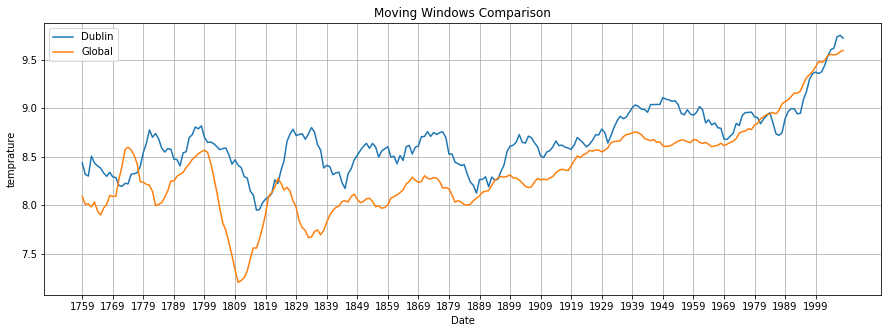

In [7]:
figure = plt.figure(figsize=[15,5])
plt.grid(True)
plt.plot(result['year'], result['localMA'], label=city)
plt.plot(result['year'], result['globalMA'], label='Global')
plt.xticks(np.arange(start, end, ma_window))
plt.legend(loc=2)
plt.title('Moving Windows Comparison')
plt.xlabel('Date')
plt.ylabel('temprature')